<a href="https://colab.research.google.com/github/nilangi-ediri/Machine-Learning-/blob/main/Copy_of_Assignment_3_Nilangi_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1** -
Perform PCA on the dataset to reduce each sample into a 10-dimensional feature vector. Show the covariance matrix of the transformed data.

**Using numpy, performing PCA:**

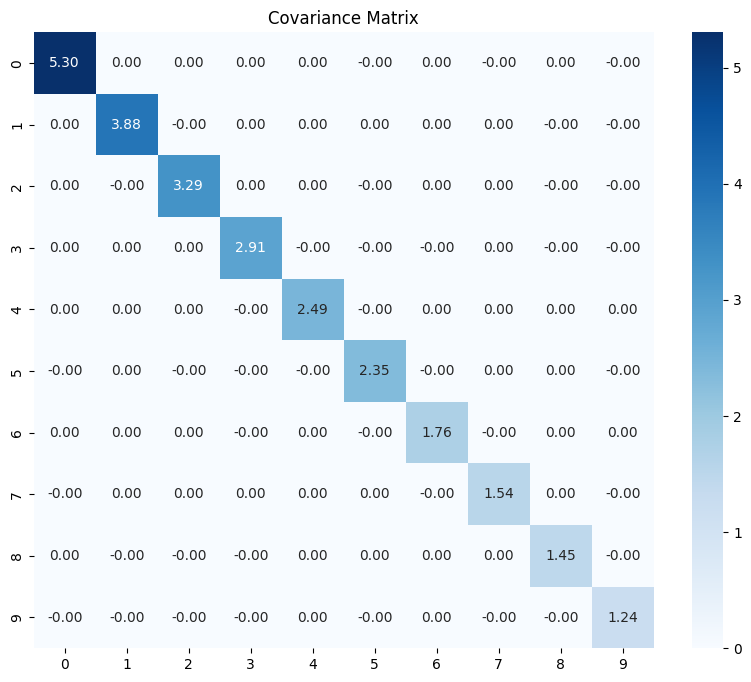

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

data = pd.read_csv('/content/drive/MyDrive/mnist-1.csv', header=None)

#Convert the dataframe into a numpy 2D array
pixels = data.iloc[:, 1:].values

#Calculating centralized data matrix X_c
pixels_mean = np.mean(pixels, axis=0)
pixels_c = pixels - pixels_mean

#Calculating the Covariance Matrix of the Original Data
cov_matrix = np.cov(pixels_c, rowvar=False)

#Finding eigen vectors and eigen values (Eigen decomposition)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

#Finding top 10 eigen vectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
top_eigenvectors = sorted_eigenvectors[:, :10]

#Transform X_c matrix with the rotational matrix P which has the top eigenvectors
pixels_pca = np.dot(pixels_c, top_eigenvectors) #Performs PCA

#Covariance matrix after transformation
pca_cov_matrix = np.cov(pixels_pca, rowvar=False)

#Plot the covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pca_cov_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Covariance Matrix')
plt.show()

**Using sklearn library - same results were achieved as from numpy:**


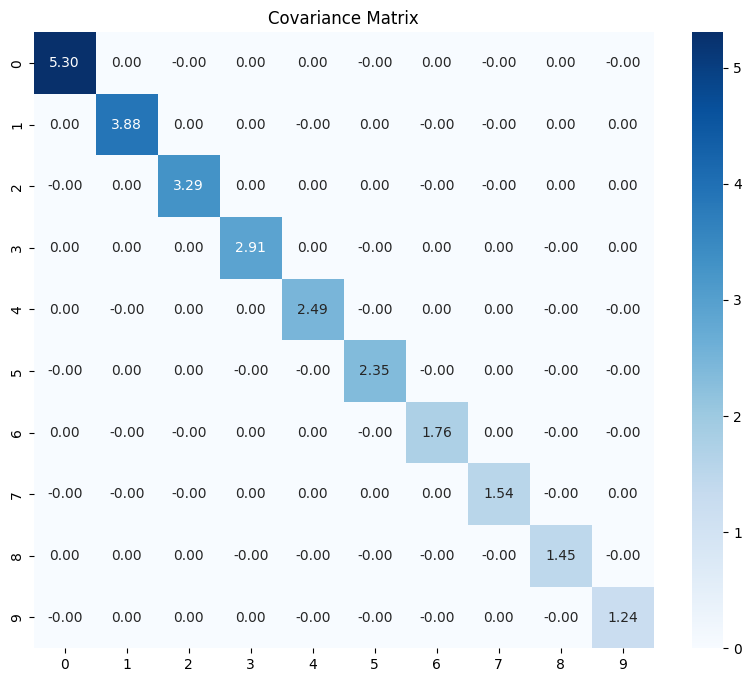

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

data = pd.read_csv('/content/drive/MyDrive/mnist-1.csv', header=None)
pixels = data.iloc[:, 1:]
pca = PCA(n_components=10)
pixels_pca = pca.fit_transform(pixels)
cov_matrix = np.cov(pixels_pca, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Covariance Matrix')
plt.show()

**Question 2** - Perform k-means clustering to cluster the dataset (without applying PCA) into 10 groups.

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/mnist-1.csv', header=None)
pixels = data.iloc[:, 1:].values

def initialize_centroids(pixel_data, k):
    #To reproduce using the same random value
    np.random.seed(42)

    #Find the first centroid randomly
    n_samples = pixel_data.shape[0]
    centroids = [pixel_data[np.random.choice(n_samples)]]

    #Choose the remaining centroids
    for _ in range(1, k):
      #Distance from each point to the closest centroid
      #axis 1 refers to rows (y axis), axis 0 refers to columns (x axis)
      distances = np.min([np.linalg.norm(pixel_data - centroid, axis=1) for centroid in centroids], axis=0)
      #Selecting the farthest point as the next centroid
      next_centroid_id = np.argmax(distances)
      centroids.append(pixel_data[next_centroid_id])

    return np.array(centroids)

#This function computes the distance from each data point to each centroid
def compute_distance(pixel_data, centroids):
    distances = np.linalg.norm(pixel_data[:, np.newaxis] - centroids, axis=2) #new axis refers to a 3rd axis
    return distances

#Assign the point to the closest centroid's cluster
def assign_clusters(distances):
    return np.argmin(distances, axis=1)#axis 1 refers to rows (y axis)

#The new mean for each cluster is calculated and assigned as new centroid
def update_centroids(pixel_data, clusters, k):
  new_centroids = [pixel_data[clusters == i].mean(axis=0) for i in range(k)]
  return np.array(new_centroids)

def k_means(pixel_data, k):
    centroids = initialize_centroids(pixel_data, k)
    previous_clusters = None
    iterations = 1
    while True:
        distances = compute_distance(pixel_data, centroids)
        clusters = assign_clusters(distances)
        if np.array_equal(clusters, previous_clusters):
            print(f'Converged after {iterations} iterations')
            break
        previous_clusters = clusters
        centroids = update_centroids(pixel_data, clusters, k)
        iterations += 1
    return clusters, centroids

clusters, centroids = k_means(pixels, 10)

print("Clusters Array:",clusters)
print()
print("Number of Data Points in Each Cluster")
for i in range(10):
    print(f'Cluster {i}:', np.count_nonzero(clusters==i))

Converged after 38 iterations
Clusters Array: [9 5 2 ... 8 0 6]

Number of Data Points in Each Cluster
Cluster 0: 447
Cluster 1: 662
Cluster 2: 897
Cluster 3: 350
Cluster 4: 1108
Cluster 5: 457
Cluster 6: 949
Cluster 7: 310
Cluster 8: 346
Cluster 9: 474


**Question 3** - Please plot the loss curve, that is, the change of loss value of the k-means algorithm with respect to the number of iterations.

Converged after 38 iterations


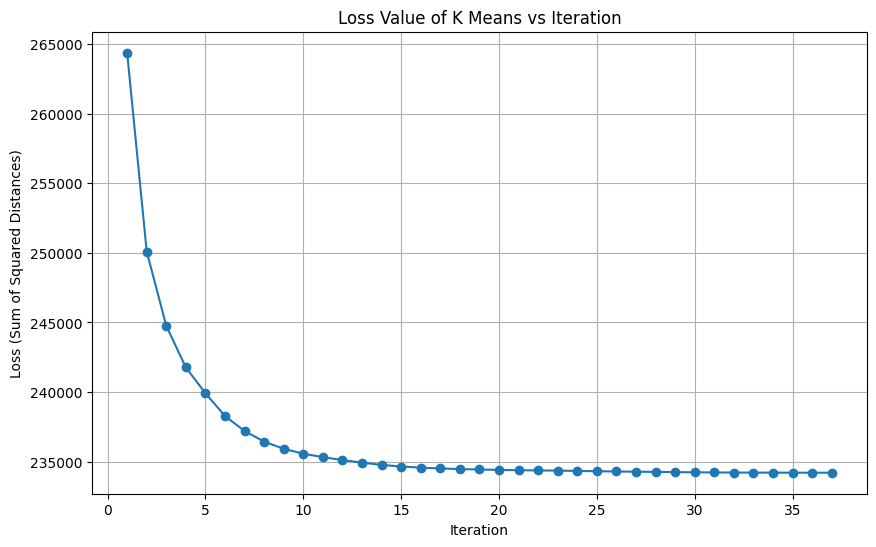

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/mnist-1.csv', header=None)
pixels = data.iloc[:, 1:].values

def initialize_centroids(pixel_data, k):
    #To reproduce using the same random value
    np.random.seed(42)

    #Find the first centroid randomly
    n_samples = pixel_data.shape[0]
    centroids = [pixel_data[np.random.choice(n_samples)]]

    #Choose the remaining centroids
    for _ in range(1, k):
      #Distance from each point to the closest centroid
      #axis 1 refers to rows (y axis), axis 0 refers to columns (x axis)
      distances = np.min([np.linalg.norm(pixel_data - centroid, axis=1) for centroid in centroids], axis=0)
      #Selecting the farthest point as the next centroid
      next_centroid_id = np.argmax(distances)
      centroids.append(pixel_data[next_centroid_id])

    return np.array(centroids)

#This function computes the distance from each data point to each centroid
def compute_distance(pixel_data, centroids):
    distances = np.linalg.norm(pixel_data[:, np.newaxis] - centroids, axis=2) #new axis refers to a 3rd axis
    return distances

#Assign the point to the closest centroid's cluster
def assign_clusters(distances):
    return np.argmin(distances, axis=1)#axis 1 refers to rows (y axis)

#The new mean for each cluster is calculated and assigned as new centroid
def update_centroids(pixel_data, clusters, k):
  new_centroids = [pixel_data[clusters == i].mean(axis=0) for i in range(k)]
  return np.array(new_centroids)

def calculate_loss(pixel_data, clusters, centroids):
    distances = np.linalg.norm(pixel_data-centroids[clusters], axis=1)
    return np.sum(distances**2)

def k_means(pixel_data, k):
    centroids = initialize_centroids(pixel_data, k)
    previous_clusters = None
    iterations = 1
    losses = []
    while True:
        distances = compute_distance(pixel_data, centroids)
        clusters = assign_clusters(distances)
        if np.array_equal(clusters, previous_clusters):
            print(f'Converged after {iterations} iterations')
            break
        previous_clusters = clusters
        centroids = update_centroids(pixel_data, clusters, k)
        loss = calculate_loss(pixel_data, clusters, centroids)
        losses.append(loss)
        iterations += 1
    return clusters, centroids, losses

clusters, centroids, losses = k_means(pixels, 10)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss (Sum of Squared Distances)')
plt.title('Loss Value of K Means vs Iteration')
plt.grid(True)
plt.show()


**Question 4** - Please use the first 4000 samples as the training set and remaining 2000 samples as the validation set, and design a way to choose the best k in k-means algorithm.

Converged after 23 iterations
For k = 2, Validation Loss = 100974.53328948631
Converged after 26 iterations
For k = 4, Validation Loss = 92155.8692505724
Converged after 22 iterations
For k = 6, Validation Loss = 86908.56230681788
Converged after 18 iterations
For k = 8, Validation Loss = 82208.72210903224
Converged after 38 iterations
For k = 10, Validation Loss = 79764.40271253066
Converged after 28 iterations
For k = 12, Validation Loss = 77934.81897849627
Converged after 30 iterations
For k = 14, Validation Loss = 76317.10368382493
Converged after 31 iterations
For k = 16, Validation Loss = 74472.79242385339
Converged after 23 iterations
For k = 18, Validation Loss = 73261.10877230269
Converged after 30 iterations
For k = 20, Validation Loss = 72530.20931699526
Converged after 48 iterations
For k = 22, Validation Loss = 71428.98639325687
Converged after 48 iterations
For k = 24, Validation Loss = 70472.3019725615
Converged after 43 iterations
For k = 26, Validation Loss = 68489.172

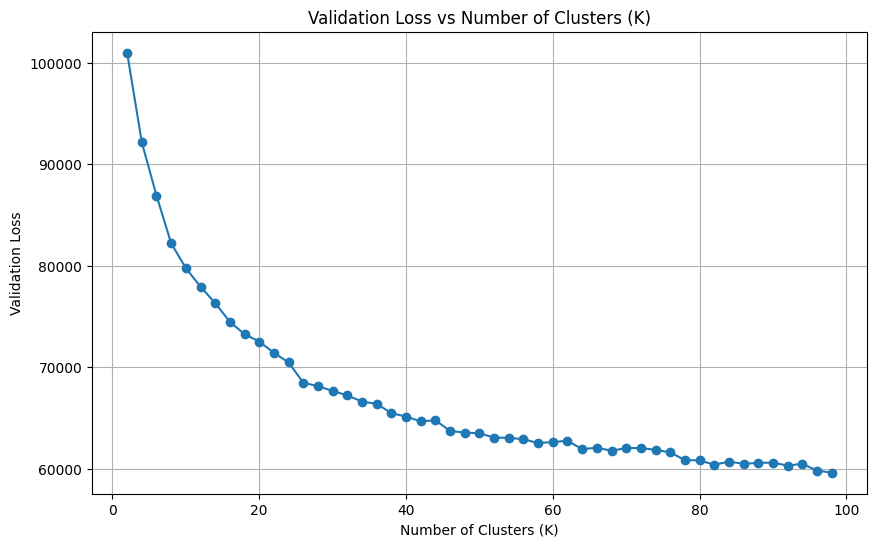

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/mnist-1.csv', header=None)
pixels = data.iloc[:, 1:].values
train_pixels = pixels[:4000]
val_pixels = pixels[4000:]

def initialize_centroids(pixel_data, k):
    #To reproduce using the same random value
    np.random.seed(42)

    #Find the first centroid randomly
    n_samples = pixel_data.shape[0]
    centroids = [pixel_data[np.random.choice(n_samples)]]

    #Choose the remaining centroids
    for _ in range(1, k):
      #Distance from each point to the closest centroid
      #axis 1 refers to rows (y axis), axis 0 refers to columns (x axis)
      distances = np.min([np.linalg.norm(pixel_data - centroid, axis=1) for centroid in centroids], axis=0)
      #Selecting the farthest point as the next centroid
      next_centroid_id = np.argmax(distances)
      centroids.append(pixel_data[next_centroid_id])

    return np.array(centroids)

#This function computes the distance from each data point to each centroid
def compute_distance(pixel_data, centroids):
    distances = np.linalg.norm(pixel_data[:, np.newaxis] - centroids, axis=2) #new axis refers to a 3rd axis
    return distances

#Assign the point to the closest centroid's cluster
def assign_clusters(distances):
    return np.argmin(distances, axis=1)#axis 1 refers to rows (y axis)

#The new mean for each cluster is calculated and assigned as new centroid
def update_centroids(pixel_data, clusters, k):
  new_centroids = [pixel_data[clusters == i].mean(axis=0) for i in range(k)]
  return np.array(new_centroids)

def calculate_loss(pixel_data, clusters, centroids):
    distances = np.linalg.norm(pixel_data-centroids[clusters], axis=1)
    return np.sum(distances**2)

def k_means(pixel_data, k):
    centroids = initialize_centroids(pixel_data, k)
    previous_clusters = None
    iterations = 1
    losses = []
    while True:
        distances = compute_distance(pixel_data, centroids)
        clusters = assign_clusters(distances)
        if np.array_equal(clusters, previous_clusters):
            print(f'Converged after {iterations} iterations')
            break
        previous_clusters = clusters
        centroids = update_centroids(pixel_data, clusters, k)
        iterations += 1
    return clusters, centroids


k_range = range(2,100,2)
validation_losses = []
for k in k_range:
   clusters, centroids = k_means(train_pixels, k)
   val_distances = compute_distance(val_pixels, centroids)
   val_clusters = assign_clusters(val_distances)
   val_loss = calculate_loss(val_pixels, val_clusters, centroids)
   validation_losses.append(val_loss)
   print(f'For k = {k}, Validation Loss = {val_loss}')

print()

plt.figure(figsize=(10, 6))
plt.plot(k_range, validation_losses, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Number of Clusters (K)')
plt.grid(True)
plt.show()

Looking at the graph and the values, the loss reduction becomes smaller around
K=20 to K=30. The curve flattens out after this range.

Based on the resultant graph, a reasonable choice for the best K would be around 26. This was identified using the elbow method. Increasing K further does not significantly minimize the validation loss.

Further, with higher values of K, computational complexity increased as higher training and validation times were observed.

Therefore, even if ideally for MINST dataset K should be 10 due to the presence of 10 diffrenet digits, according to the observation, **best value for K = 26.**

**Question 5** - Please implement kernel k-means algorithm with RBF-kernel

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/mnist-1.csv', header=None)
pixels = data.iloc[:500, 1:].values

def rbf_kernel(X,sigma):
    pairwise_sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X**2, axis=1) - 2 * np.dot(X, X.T)
    return np.exp(-pairwise_sq_dists / (2 * sigma**2))

def initialize_rbf_centroids(n_samples, k):
    #To reproduce using the same random value
    np.random.seed(42)
    return np.random.choice(k, n_samples)

#This function computes the distance from each data point to each centroid
def compute_kernel_distances(K, clusters, k):
    n_samples = K.shape[0]
    distances = np.zeros((n_samples, k))

    for cluster_idx in range(k):
        cluster_points = np.where(clusters == cluster_idx)[0]
        N_k = len(cluster_points)

        if N_k > 0:
            # First term: K(x_i, x_i) as in slide - The Cunnning Plan
            K_xi_xi = np.diag(K)

            # Second term: Only considered the points in the cluster (Where z_jk=1)
            K_xj_xi = np.mean(K[cluster_points], axis=0)  # mean over cluster points

            # Third term: Average of distances from cluster to cluster
            K_xj_xm = np.mean(K[cluster_points][:, cluster_points])

            # Compute the final kernel distance for each point i to cluster k
            distances[:, cluster_idx] = K_xi_xi - 2 * K_xj_xi + K_xj_xm

    return distances

def k_means_rbf(X, k, sigma):
    n_samples = X.shape[0]

    # Compute kernel matrix
    sigma = calculate_sigma(X)
    K = rbf_kernel(X, sigma)

    # Initialize clusters
    clusters = initialize_rbf_centroids(n_samples, k)
    iterations = 1

    while True:
        # Save previous clusters
        prev_clusters = clusters.copy()

        # Compute kernel distances to cluster means using kernel trick
        distances = compute_kernel_distances(K, clusters, k)

        # Assign new clusters based on kernel distances
        clusters = np.argmin(distances, axis=1)

        # Check for convergence
        if np.array_equal(clusters, prev_clusters):
            print(f"Converged after {iterations} iterations.")
            break
        iterations += 1
        print("Iterations:",iterations)

    return clusters

def calculate_sigma(X):
  n_samples = X.shape[0]
  total_distance = 0
  for i in range(n_samples):
    for j in range(i+1, n_samples):
      total_distance += np.linalg.norm(X[i] - X[j])**2
  average_distance = total_distance / (n_samples * (n_samples - 1) / 2)
  sigma = np.sqrt(average_distance/2)
  return sigma

sigma = calculate_sigma(pixels)


print("Value of Sigma:",sigma)

clusters = k_means_rbf(pixels, 5, sigma)

print("Clusters Array:",clusters)
print()
print("Number of Data Points in Each Cluster")
for i in range(5):
    print(f'Cluster {i}:', np.count_nonzero(clusters==i))

Value of Sigma: 7.148235974257568
Iterations: 2
Iterations: 3
Iterations: 4
Iterations: 5
Iterations: 6
Iterations: 7
Iterations: 8
Iterations: 9
Iterations: 10
Iterations: 11
Iterations: 12
Iterations: 13
Iterations: 14
Iterations: 15
Converged after 15 iterations.
Clusters Array: [2 2 3 4 1 2 4 2 4 1 2 4 3 0 4 1 2 2 0 1 3 2 1 4 0 2 1 2 3 4 3 2 0 1 2 4 0
 2 1 0 4 2 1 1 3 1 1 2 3 2 3 3 1 4 1 2 3 1 1 4 3 4 0 2 0 4 0 4 3 3 4 1 4 0
 3 2 3 4 4 1 3 2 2 0 1 2 3 1 3 1 0 1 1 0 2 2 1 2 3 4 0 1 4 1 4 4 0 2 3 0 1
 2 4 4 3 1 1 2 3 2 3 3 4 1 4 2 0 1 4 0 3 1 4 1 3 2 3 4 3 1 1 4 1 0 3 4 2 0
 1 3 0 0 4 1 1 0 3 2 3 2 1 2 1 1 3 0 1 1 4 2 1 2 1 4 4 4 1 4 2 2 4 2 3 1 4
 1 0 2 1 0 0 4 3 1 1 1 3 2 3 1 4 4 2 2 0 4 3 2 4 3 3 4 1 2 1 2 3 1 0 2 2 0
 3 1 1 2 1 1 3 3 1 4 0 2 3 2 2 1 0 0 4 3 2 1 3 2 3 1 4 3 0 4 4 2 3 2 4 1 1
 0 3 0 0 1 1 2 3 1 1 4 4 1 1 0 0 1 4 2 0 2 1 2 3 3 3 1 0 4 1 1 4 2 0 3 3 2
 3 1 3 0 4 1 0 2 1 1 3 1 2 4 4 0 3 1 1 4 3 2 4 1 3 2 1 0 1 2 3 2 2 1 3 0 3
 2 1 0 1 1 1 2 0 2 1 2 1 4 1 2 2 1 1 4 3 1